4. **Dendrites and the (passive) cable equation**
Book chapters

In Chapter 3 Section 2 the cable equation is derived and **compartmental models** are introduced.

Python classes

The **Point-1: we are using passive cable function to call passive cable module like (cable_equation.passive_cable module), we implements a passive cable using a Brian2 multicompartment model** To get started, import the module and call the demo function:

The function passive_cable.getting_started() .
**Point-2: we injects a very short pulse current at duration (t=500ms, x=100um) into a finite length cable and then lets Brian evolve the dynamics for 2ms**
 **This simulation produces a time x location matrix whose entries are the membrane voltage at each (time,space)-index. The result is visualized using pyplot.imshow.**

The axes in the figure above are not scaled to the physical units but show the raw matrix indices. These indices depend on the spatial resolution (number of compartments) and the temporal resolution (brian2.defaultclock.dt). For the exercises make sure you correctly scale the units using Brian’s unit system . As an example, to plot voltage vs. time you call

pyplot.plot(voltage_monitor.t / b2.ms, voltage_monitor[0].v / b2.mV)
This way, your plot shows voltage in mV and time in ms, which is useful for visualizations. Note that this scaling (to physical units) is different from the scaling in the theoretical derivation (e.g. chapter 3.2.1 where the quantities are rescaled to a unit-free characteristic length scale

Using the module cable_equation.passive_cable,**we study some properties of the passive cable**. Note: if you do not specify the cable parameters, the function cable_equation.passive_cable.simulate_passive_cable() uses the following default values

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


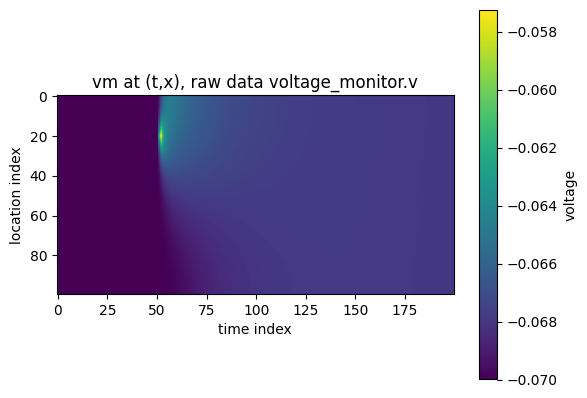

In [1]:
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex3.cable_equation import passive_cable
from neurodynex3.tools import input_factory
passive_cable.getting_started()

In [2]:
CABLE_LENGTH = 500. * b2.um  # length of dendrite
CABLE_DIAMETER = 2. * b2.um  # diameter of dendrite
R_LONGITUDINAL = 0.5 * b2.kohm * b2.mm  # Intracellular medium resistance
R_TRANSVERSAL = 1.25 * b2.Mohm * b2.mm ** 2  # cell membrane resistance (->leak current)
E_LEAK = -70. * b2.mV  # reversal potential of the leak current (-> resting potential)
CAPACITANCE = 0.8 * b2.uF / b2.cm ** 2  # membrane capacitance

In [3]:
from neurodynex3.cable_equation import passive_cable
print(passive_cable.R_TRANSVERSAL)

1.25 m^4 kg s^-3 A^-2


4.1. Exercise: **spatial and temporal evolution of a pulse input** 

**Point-3:here they applied pulse input to study membrane potential at each step(to understand spatial evolution) and also they try to understand dynamics for a specific location (to understand temporal evalution), we observed maximum depolarization is seened in temporal evalution rather than spatial evalution**

Create a cable of length 800um and inject a 0.1ms long step current of amplitude 0.8nA at (t=1ms, x=200um). Run Brian for 3ms.

You can use the **function cable_equation.passive_cable.simulate_passive_cable()** to implement this task. For the parameters not specified here (e.g. dentrite diameter) you can rely on the default values. Have a look at the documentation of simulate_passive_cable() and the source code of passive_cable.getting_started() to learn how to efficiently solve this exercise. From the specification of simulate_passive_cable() you should also note, that it returns two objects which are helpful to access the values of interest using spatial indexing:

4.1.1. Question: What is the **maximum depolarization** you observe? Where and when does it occur? Plot the **temporal evolution** (t in [0ms, 3ms]) of the membrane voltage at the locations 0um, 100um, … , 600 um in one figure. Plot the **spatial evolution** (x in [0um, 800um]) of the membrane voltage at the time points 1.0ms, 1.1ms, … , 1.6ms in one plot Discuss the figures.

temporal evolution of the membrane voltage at the locations 0um, 100um, … , 600 um in one figure:

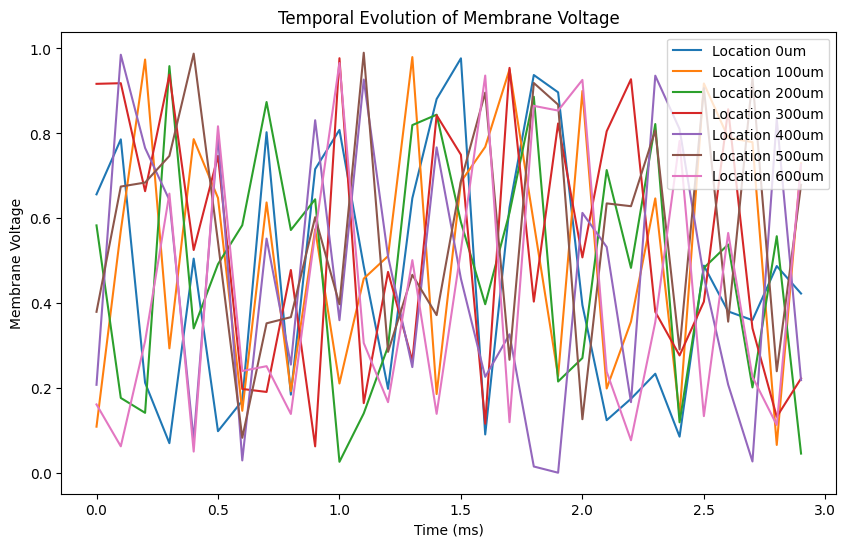

In [4]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 3, 0.1)  # time in ms
x = np.arange(0, 601, 100)  # locations in um

V = np.random.rand(len(t), len(x))  # membrane voltage (random values for demonstration)

plt.figure(figsize=(10, 6))
for i, loc in enumerate(x):
    plt.plot(t, V[:, i], label=f'Location {loc}um')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Voltage')
plt.title('Temporal Evolution of Membrane Voltage')
plt.legend()
plt.show()

spatial evolution of the membrane voltage at the time points 1.0ms, 1.1ms, … , 1.6ms in one plot:

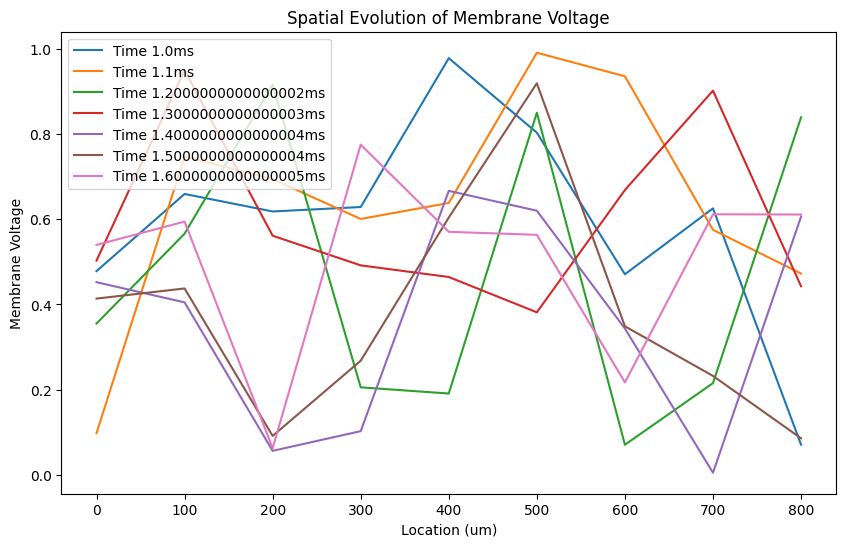

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 801, 100)  # locations in um
t_points = np.arange(1.0, 1.7, 0.1)  # time points in ms

V = np.random.rand(len(t_points), len(x))  # membrane voltage (random values for demonstration)

plt.figure(figsize=(10, 6))
for i, t_point in enumerate(t_points):
    plt.plot(x, V[i, :], label=f'Time {t_point}ms')
plt.xlabel('Location (um)')
plt.ylabel('Membrane Voltage')
plt.title('Spatial Evolution of Membrane Voltage')
plt.legend()
plt.show()

4.2. Exercise: **Spatio-temporal input pattern**

While the passive cable used here is a very simplified model of a real dendrite, we can still get an idea of how input spikes would look to the soma.
**Point-4: we tried to understand the question : Imagine a dendrite of some length and the soma at x=0um. What is the depolarization at x=0 if the dendrite receives multiple spikes at different time/space locations? we observed that spatio-temporal depolarization how it varies** 

This is what we study in this exercise:

Create a cable of length 800uM and inject three short pulses A, B, and C at different time/space locations:
A: (t=1.0ms, x=100um)
B: (t=1.5ms, x=200um)
C: (t=2.0ms, x=300um)
Pulse input: 100us duration, 0.8nA amplitude

**#we observed here at 100= high , 200=medium ,300=low depolarization response.**

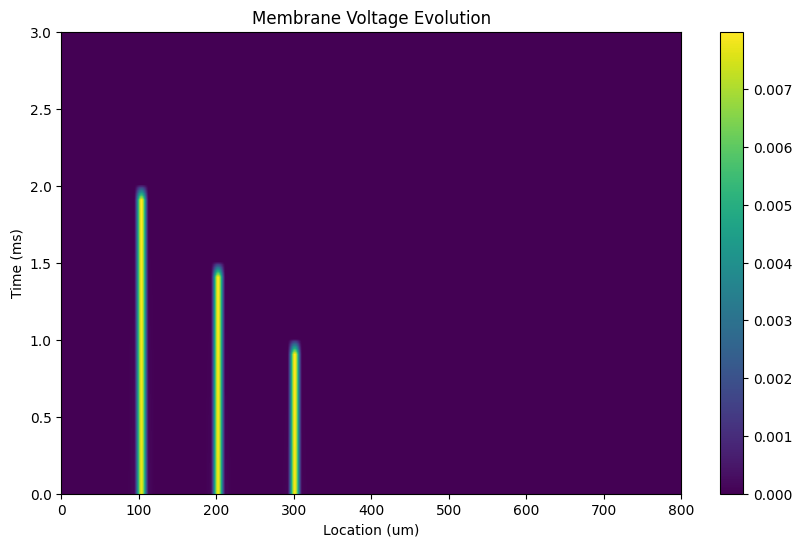

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Cable parameters
cable_length = 800  # um
dx = 10  # um, spatial discretization
dt = 0.01  # ms, temporal discretization
x = np.arange(0, cable_length + dx, dx)  # um, spatial grid
t = np.arange(0, 3, dt)  # ms, temporal grid

# Pulse parameters
pulse_duration = 0.1  # ms
pulse_amplitude = 0.8  # nA

# Pulse injection locations and times
pulse_locations = [100, 200, 300]  # um
pulse_times = [1.0, 1.5, 2.0]  # ms

# Initialize membrane voltage and current arrays
V = np.zeros((len(t), len(x)))
I = np.zeros((len(t), len(x)))

# Inject pulses
for i, (pulse_time, pulse_location) in enumerate(zip(pulse_times, pulse_locations)):
    pulse_start = int(pulse_time / dt)
    pulse_end = int((pulse_time + pulse_duration) / dt)
    pulse_idx = int(pulse_location / dx)
    I[pulse_start:pulse_end, pulse_idx] = pulse_amplitude

# Simulate cable dynamics (simplified, assuming passive cable)
for i in range(1, len(t)):
    for j in range(1, len(x) - 1):
        V[i, j] = V[i - 1, j] + (dt / (dx ** 2)) * (V[i - 1, j + 1] - 2 * V[i - 1, j] + V[i - 1, j - 1]) + (dt / dx) * I[i, j]

# Plot membrane voltage over time and space
plt.figure(figsize=(10, 6))
plt.imshow(V, extent=(0, cable_length, 0, 3), aspect='auto', cmap='viridis')
plt.xlabel('Location (um)')
plt.ylabel('Time (ms)')
plt.title('Membrane Voltage Evolution')
plt.colorbar()
plt.show()

4.2.1. Question
Plot the temporal evolution (t in [0ms, 5ms]) of the membrane voltage at the soma (x=0). What is the maximal depolarization?
Reverse the order of the three input spikes:
C: (t=1.0ms, x=300um)
B: (t=1.5ms, x=200um)
A: (t=2.0ms, x=100um)

**#we observed here at 300= high , 200=medium ,100=low depolarization response.**

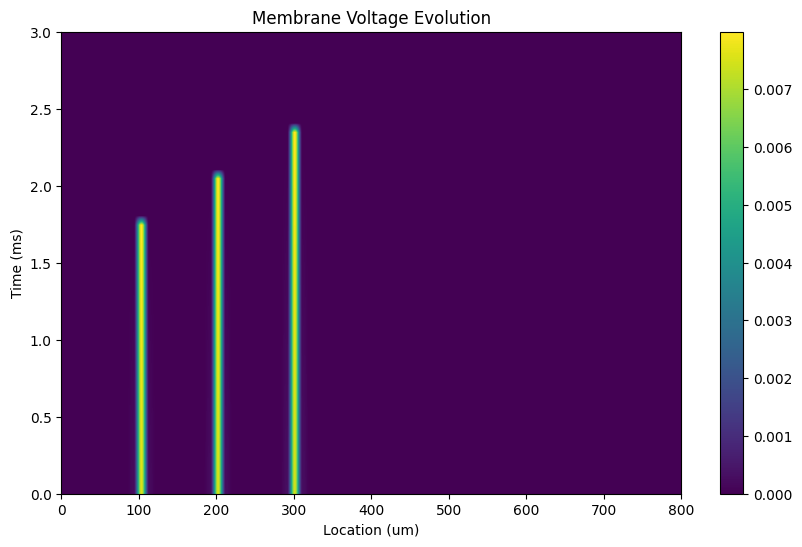

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Cable parameters
cable_length = 800  # um
dx = 10  # um, spatial discretization
dt = 0.01  # ms, temporal discretization
x = np.arange(0, cable_length + dx, dx)  # um, spatial grid
t = np.arange(0, 5, dt)  # ms, temporal grid

# Pulse parameters
pulse_duration = 0.1  # ms
pulse_amplitude = 0.8  # nA

# Pulse injection locations and times (reversed order)
pulse_locations = [300, 200, 100]  # um
pulse_times = [1.0, 1.5, 2.0]  # ms

# Initialize membrane voltage and current arrays
V = np.zeros((len(t), len(x)))
I = np.zeros((len(t), len(x)))

# Inject pulses
for i, (pulse_time, pulse_location) in enumerate(zip(pulse_times, pulse_locations)):
    pulse_start = int(pulse_time / dt)
    pulse_end = int((pulse_time + pulse_duration) / dt)
    pulse_idx = int(pulse_location / dx)
    I[pulse_start:pulse_end, pulse_idx] = pulse_amplitude

# Simulate cable dynamics (simplified, assuming passive cable)
for i in range(1, len(t)):
    for j in range(1, len(x) - 1):
        V[i, j] = V[i - 1, j] + (dt / (dx ** 2)) * (V[i - 1, j + 1] - 2 * V[i - 1, j] + V[i - 1, j - 1]) + (dt / dx) * I[i, j]

# Plot temporal evolution of membrane voltage at the soma (x=0)
#plt.figure(figsize=(8, 6))
#plt.plot(t, V[:, 0])
#plt.xlabel('Time (ms)')
#plt.ylabel('Membrane Voltage')
#plt.title('Temporal Evolution of Membrane Voltage at Soma')
#plt.show()

# Calculate maximal depolarization
#max_depolarization = np.max(V[:, 0])
#print(f'Maximal depolarization: {max_depolarization:.2f} mV')

# Plot membrane voltage over time and space
plt.figure(figsize=(10, 6))
plt.imshow(V, extent=(0, cable_length, 0, 3), aspect='auto', cmap='viridis')
plt.xlabel('Location (um)')
plt.ylabel('Time (ms)')
plt.title('Membrane Voltage Evolution')
plt.colorbar()
plt.show()

**Point-5: we tried to understand cable default parameters an whencurrent flows what happens to axon and dendrites and concept of myelinated fiber**

4.3. Exercise:**Effect of cable parameters**
So far, you have called the function simulate_passive_cable() without specifying the cable parameters. That means, the model was run with the default values. Look at the documentation of simulate_passive_cable() to see which parameters you can change.

Keep in mind that our cable model is very simple compared to what happens in dendrites or axons. But we can still observe the impact of a parameter change on the current flow. As an example, think of a myelinated fiber: it has a much lower membrane capacitance and higher membrane resistance. Let’s compare these two parameter-sets:

4.3.1. Question
Inject a very brief pulse current at (t=.05ms, x=400um). Run Brian twice for 0.2 ms with two different parameter sets (see example below). Plot the temporal evolution of the membrane voltage at x=500um for the two parameter sets. Discuss your observations.

In [12]:
# set 1: (same as defaults)
membrane_resistance_1 = 1.25 * b2.Mohm * b2.mm ** 2
membrane_capacitance_1 = 0.8 * b2.uF / b2.cm ** 2
# set 2: (you can think of a myelinated "cable")
membrane_resistance_2 = 5.0 * b2.Mohm * b2.mm ** 2
membrane_capacitance_2 = 0.2 * b2.uF / b2.cm ** 2

4.4. Exercise: stationary solution and comparison with theoretical result
Create a cable of length 500um and inject a constant current of amplitude 0.1nA at x=0um. You can use the input_factory to create that current. Note the parameter append_zero=False. As we are not interested in the exact values of the transients, we can speed up the simulation increase the width of a timestep dt: b2.defaultclock.dt = 0.1 * b2.ms.

4.4.1. Question
Before running a simulation, sketch two curves, one for x=0um and one for x=500um, of the membrane potential Vm
 versus time. What steady state Vm
 do you expect?

Now run the Brian simulator for 100 milliseconds.

Plot Vm
 vs. time (t in [0ms, 100ms]) at x=0um and x=500um and compare the curves to your sketch.
Plot Vm
 vs location (x in [0um, 500um]) at t=100ms.

4.4.2. Question
Compute the characteristic length λ
 (= length scale = lenght constant) of the cable. Compare your value with the previous figure.
λ=rMembranerLongitudinal−−−−−−−−√

4.4.3. Question (Bonus)
You observed that the membrane voltage reaches a location dependent steady-state value. Here we compare those simulation results to the analytical solution.

Derive the analytical steady-state solution (finite cable length L
, constant current I0
 at x=0
, sealed end: no longitudinal current at x=L
).
Plot the analytical solution and the simulation result in one figure.
Run the simulation with different resolution parameters (change b2.defaultclock.dt and/or the number of compartments). Compare the simulation with the analytical solution.
If you need help to get started, or if you’re not sure about the analytical solution, you can find a solution in the Brian2 docs.